Hi ppl, I have created this notebook, you can verify or do your answers.
### You can connect with me on LinkedIn: https://www.linkedin.com/in/akshit12mittal

## To solve this module, we need to have AI Proxy Tokens.
1. Get your token at: https://aiproxy.sanand.workers.dev/

2. Sign in with your iitm id and u'll get one.(Remember, we have limited usage, use them wisely)

## Q1
1. Change the meaningless text with your text

In [ ]:
import httpx

# API endpoint
API_URL = "https://aiproxy.sanand.workers.dev/openai/v1/chat/completions"

# Dummy API key
HEADERS = {
    "Authorization": "Bearer dummy_api_key",
    "Content-Type": "application/json"
}

# Request payload
DATA = {
    "model": "gpt-4o-mini",
    "messages": [
        {"role": "system", "content": "Analyze the sentiment of the following text as GOOD, BAD, or NEUTRAL."},
        {"role": "user", "content": "XXDnE1Xhs6 Kt5h Vh K6cr X 1AU 8VX H Z5 hCs y amN Y"}
    ]
}

# Send POST request
try:
    response = httpx.post(API_URL, json=DATA, headers=HEADERS)
    response.raise_for_status()

    # Parse response
    result = response.json()
    print(result)
except httpx.HTTPStatusError as e:
    print(f"HTTP error occurred: {e.response.status_code} - {e.response.text}")
except Exception as e:
    print(f"An error occurred: {e}")

## Q2

1. Go to this site: https://platform.openai.com/tokenizer

2. Paste your input.

3. If it does not give the correct ans, try incrementing till 8.

In [ ]:
# For me it gave 222 tokens and 353 characters, however correct ans for me was 229.

## Q3

1. to get the answer box, right click on the portal and select inspect.

2. Select the code under the "Write your JSON here" and change:\
 i. "textarea" to "input"\
 ii. "d-none" to "d-block"\
 iii. remove "disabled"
```
<textarea class="form-control font-monospace text-bg-dark" rows="6" id="q-llm-vision" name="q-llm-vision"></textarea>scroll
```
to
```
<input class="form-control font-monospace text-bg-dark d-block" rows="6" id="q-generate-addresses-with-llms" name="q-generate-addresses-with-llms">
```

### Here's how it should have looked like:
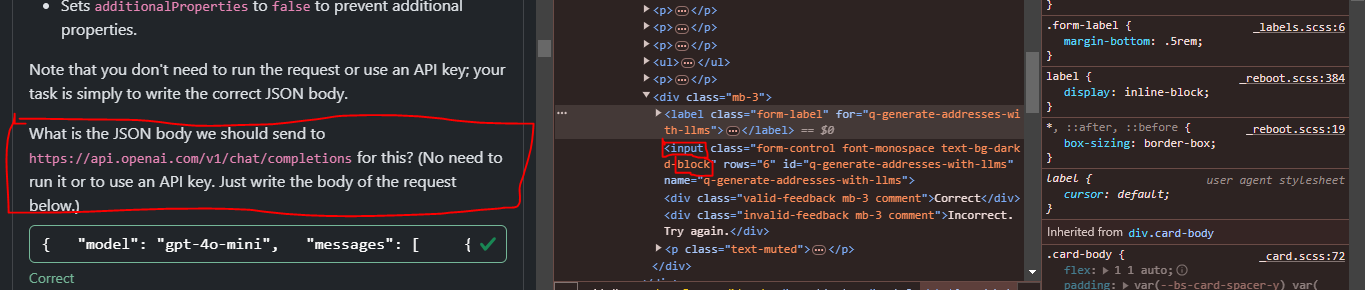

In [ ]:
{
  "model": "gpt-4o-mini",
  "messages": [
    {
      "role": "system",
      "content": "Respond in JSON"
    },
    {
      "role": "user",
      "content": "Generate 10 random addresses in the US"
    }
  ],
  "response_format": {
    "type": "json_schema",
    "json_schema": {
      "name": "address_response",
      "strict": true,
      "schema": {
        "type": "object",
        "properties": {
          "addresses": {
            "type": "array",
            "items": {
              "type": "object",
              "properties": {
                "county": {
                  "type": "string"
                },
                "latitude": {
                  "type": "number"
                },
                "longitude": {
                  "type": "number"
                }
              },
              "required": ["county", "latitude", "longitude"],
              "additionalProperties": false
            }
          }
        },
        "required": ["addresses"],
        "additionalProperties": false
      }
    }
  }
}

## Q4

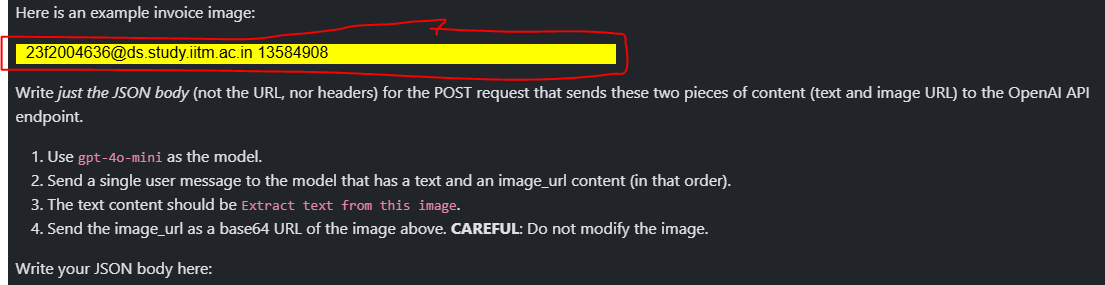

1. Open the image in new tab and copy the url.(above image is what I got)

2. Replace the url in the below code.(it will convert it into base64)

In [ ]:
{
  "model": "gpt-4o-mini",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "Extract text from this image"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "Add the URL"
          }
        }
      ]
    }
  ]
}

{'model': 'gpt-4o-mini',
 'messages': [{'role': 'user',
   'content': [{'type': 'text', 'text': 'Extract text from this image'},
    {'type': 'image_url',
     'image_url': {'url': 'data:image/webp;base64,<BASE64_STRING>'}}]}]}

## Q5
Replace the input of "dear user, please ....." with your code code and id from the portal:)

In [ ]:
{
  "model": "text-embedding-3-small",
  "input": [
    "Dear user, please verify your transaction code 29397 sent to 23fxxxxxxx@ds.study.iitm.ac.in",
    "Dear user, please verify your transaction code 70468 sent to 23fxxxxxxx@ds.study.iitm.ac.in"
  ]
}

## Q6
1. paste the below code

In [ ]:
import numpy as np

def most_similar(embeddings):
    max_similarity = -1
    most_similar_pair = None

    phrases = list(embeddings.keys())

    for i in range(len(phrases)):
        for j in range(i + 1, len(phrases)):
            v1 = np.array(embeddings[phrases[i]])
            v2 = np.array(embeddings[phrases[j]])

            similarity = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

            if similarity > max_similarity:
                max_similarity = similarity
                most_similar_pair = (phrases[i], phrases[j])

    return most_similar_pair

## Q7
1. Open VS code and create a file called q7.py(or anything of ur choice)

2. Paste the below code and type your AI token in the code.

3. type "uvicorn q7:main --reload" in the powershell.

4. After running succesfully, paste this in portal: http://127.0.0.1:8000/similarity

In [ ]:
import os
# from dotenv import load_dotenv
from fastapi import FastAPI, HTTPException, Request
from fastapi.middleware.cors import CORSMiddleware
import requests
from typing import Dict, List
import numpy as np
import traceback

# Load environment variables from .env file
# load_dotenv()

# Ensure AIPROXY_TOKEN is properly loaded
AIPROXY_TOKEN = "add your token"
if not AIPROXY_TOKEN:
    raise ValueError("AIPROXY_TOKEN environment variable not set. Make sure it's defined in your .env file.")

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Allow all origins for development
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

def cosine_similarity(a, b):
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return 0.0 if norm_a == 0 or norm_b == 0 else np.dot(a, b) / (norm_a * norm_b)

@app.post("/similarity")
async def get_similar_docs(request: Request, request_body: Dict):
    try:
        docs: List[str] = request_body.get("docs")
        query: str = request_body.get("query")

        if not docs or not query:
            raise HTTPException(status_code=400, detail="Missing 'docs' or 'query' in request body")

        input_texts = [query] + docs  # Combine query and docs for embeddings request

        headers = {
            "Content-Type": "application/json",
            "Authorization": f"Bearer {AIPROXY_TOKEN}"
        }
        data = {"model": "text-embedding-3-small", "input": input_texts}
        embeddings_response = requests.post(
            "https://aiproxy.sanand.workers.dev/openai/v1/embeddings",
            headers=headers,
            json=data
        )

        embeddings_response.raise_for_status()
        embeddings_data = embeddings_response.json()

        query_embedding = embeddings_data['data'][0]['embedding']
        doc_embeddings = [emb['embedding'] for emb in embeddings_data['data'][1:]]

        similarities = [(i, cosine_similarity(query_embedding, doc_embeddings[i]), docs[i]) for i in range(len(docs))]
        ranked_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
        top_matches = [doc for _, _, doc in ranked_docs[:min(3, len(ranked_docs))]]

        return {"matches": top_matches}

    except requests.exceptions.RequestException as e:
        raise HTTPException(status_code=500, detail=f"Error communicating with AI Proxy: {e}")
    except Exception as e:
        traceback.print_exc()
        raise HTTPException(status_code=500, detail=f"An error occurred: {str(e)}")

if __name__ == "_main_":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)

## Q8

1. Open VS code and create a file called q8.py(or anything of ur choice)

2. Add /execute at the end while submitting.

In [ ]:
import os
from fastapi import FastAPI, HTTPException
from fastapi.middleware.cors import CORSMiddleware
import json
import re

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["GET"],
    allow_headers=["*"],
)

def get_ticket_status(ticket_id: int):
    return {"ticket_id": ticket_id}

def schedule_meeting(date: str, time: str, meeting_room: str):
    return {"date": date, "time": time, "meeting_room": meeting_room}

def get_expense_balance(employee_id: int):
    return {"employee_id": employee_id}

def calculate_performance_bonus(employee_id: int, current_year: int):
    return {"employee_id": employee_id, "current_year": current_year}

def report_office_issue(issue_code: int, department: str):
    return {"issue_code": issue_code, "department": department}

@app.get("/execute")
async def execute_query(q: str):
    try:
        query = q.lower()
        pattern_debug_info = {}

        # Ticket status pattern
        if re.search(r"ticket.*?\d+", query):
            ticket_id = int(re.search(r"ticket.*?(\d+)", query).group(1))
            return {"name": "get_ticket_status", "arguments": json.dumps({"ticket_id": ticket_id})}
        pattern_debug_info["ticket_status"] = re.search(r"ticket.*?\d+", query) is not None

        # Meeting scheduling pattern
        if re.search(r"schedule.?\d{4}-\d{2}-\d{2}.?\d{2}:\d{2}.*?room", query, re.IGNORECASE):
            date_match = re.search(r"(\d{4}-\d{2}-\d{2})", query)
            time_match = re.search(r"(\d{2}:\d{2})", query)
            room_match = re.search(r"room\s*([A-Za-z0-9]+)", query, re.IGNORECASE)
            if date_match and time_match and room_match:
                return {"name": "schedule_meeting", "arguments": json.dumps({
                    "date": date_match.group(1),
                    "time": time_match.group(1),
                    "meeting_room": f"Room {room_match.group(1).capitalize()}"
                })}
        pattern_debug_info["meeting_scheduling"] = re.search(r"schedule.?\d{4}-\d{2}-\d{2}.?\d{2}:\d{2}.*?room", query, re.IGNORECASE) is not None

        # Expense balance pattern
        if re.search(r"expense", query):
            emp_match = re.search(r"employee\s*(\d+)", query, re.IGNORECASE)
            if emp_match:
                return {"name": "get_expense_balance", "arguments": json.dumps({
                    "employee_id": int(emp_match.group(1))
                })}
        pattern_debug_info["expense_balance"] = re.search(r"expense", query) is not None

        # Performance bonus pattern
        if re.search(r"bonus", query, re.IGNORECASE):
            emp_match = re.search(r"emp(?:loyee)?\s*(\d+)", query, re.IGNORECASE)
            year_match = re.search(r"\b(2024|2025)\b", query)
            if emp_match and year_match:
                return {"name": "calculate_performance_bonus", "arguments": json.dumps({
                    "employee_id": int(emp_match.group(1)),
                    "current_year": int(year_match.group(1))
                })}
        pattern_debug_info["performance_bonus"] = re.search(r"bonus", query, re.IGNORECASE) is not None

        # Office issue pattern
        if re.search(r"(office issue|report issue)", query, re.IGNORECASE):
            code_match = re.search(r"(issue|number|code)\s*(\d+)", query, re.IGNORECASE)
            dept_match = re.search(r"(in|for the)\s+(\w+)(\s+department)?", query, re.IGNORECASE)
            if code_match and dept_match:
                return {"name": "report_office_issue", "arguments": json.dumps({
                    "issue_code": int(code_match.group(2)),
                    "department": dept_match.group(2).capitalize()
                })}
        pattern_debug_info["office_issue"] = re.search(r"(office issue|report issue)", query, re.IGNORECASE) is not None

        raise HTTPException(status_code=400, detail=f"Could not parse query: {q}")

    except Exception as e:
        raise HTTPException(
            status_code=400,
            detail=f"Failed to parse query: {q}. Error: {str(e)}. Pattern matches: {pattern_debug_info}"
        )

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8080)

## Q9
Use any of this....Cheers!!

1. Say only "Yes" or "No". Do humans need oxygen to breathe?
2. Say only "Yes" or "No". Is fire hot?
3. Say only "Yes" or "No". Is 100 greater than 50?
4. Say only "Yes" or "No". Is the sky blue during a clear day?
5. Say only "Yes" or "No". Is ice cold?
6. Say only "Yes" or "No". Does gravity pull objects downward?
7. Say only "Yes" or "No". Is Earth a planet?
8. Say only "Yes" or "No". Do cars have wheels?
9. Say only "Yes" or "No". Is water wet?
10. Say only "Yes" or "No". Is sun hot?